# Limpieza

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb

## Dataset Ventas

In [75]:
# Abrimos el dataset
ventas = pd.read_csv('../data/vgsales.csv')
ventas.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [76]:
# Unificamos el formato de nombre de las columnas a minúsculas para facilitar el análisis y convertimos la columna 'rank' en el index:
nombre_cols = {col: col.lower() for col in ventas.columns}
ventas.rename(columns = nombre_cols, inplace=True )
ventas.set_index('rank', inplace=True)

In [77]:
ventas.head()

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Exploración inicial

In [18]:
def info_basica(mi_df):
    '''Param: dataframe a explorar
        Return: información general báscia del dataframe 
    '''
    return f'El dataset tiene {mi_df.shape[1]} columnas y {mi_df.shape[0]} filas, contiene {mi_df.isnull().sum().sum()} datos nulos y {mi_df.duplicated().sum()} valores duplicados'

In [19]:
info_basica(ventas)

'El dataset tiene 10 columnas y 16598 filas, contiene 329 datos nulos y 1 valores duplicados'

In [20]:
# Comprobamos los tipos de nuestros datos
ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16598 non-null  object 
 1   platform      16598 non-null  object 
 2   year          16327 non-null  float64
 3   genre         16598 non-null  object 
 4   publisher     16540 non-null  object 
 5   na_sales      16598 non-null  float64
 6   eu_sales      16598 non-null  float64
 7   jp_sales      16598 non-null  float64
 8   other_sales   16598 non-null  float64
 9   global_sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


- Tras un primer análisis, todas las columnas excepto el 'Year', que debería ser un número entero, parecen ser del tipo correcto.

Antes de intentar hacer un cambio en el tipo de variable, comprobamos si 'Year' es una de las variables que contiene nulos, dado que en caso afirmativo no podremos hacer el cambio.

In [21]:
# Exploramos los datos nulos
ventas.stb.missing()

,missing,total,percent
year,271,16598,1.632727
publisher,58,16598,0.349440
name,0,16598,0.000000
platform,0,16598,0.000000
genre,0,16598,0.000000
na_sales,0,16598,0.000000
eu_sales,0,16598,0.000000
jp_sales,0,16598,0.000000
other_sales,0,16598,0.000000
global_sales,0,16598,0.000000


Observamos que la columna 'Year' es la que contiene el mayot porcentaje de nulos (alrededor de un 1.6%), seguida únicamenter por la columna 'Publisher', con un 0.35% de valores nulos. Antes de continuar, tenemos que tomar la decisión de qué hacer respecto a estos nulos.

In [22]:
# Exploramos qué datos contienen los valores nulos en 'Year'
año_nulo = ventas[ventas['year'].isnull()]
año_nulo.sample(5)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
rank,,,,,,,,,,
12240,Port Royale 3,X360,NaN,Simulation,Kalypso Media,0.06,0.00,0.00,0.00,0.07
4860,Silent Hill: Homecoming,PS3,NaN,Action,Konami Digital Entertainment,0.18,0.15,0.00,0.06,0.40
3196,Monster Hunter 2,PS2,NaN,Role-Playing,Capcom,0.00,0.00,0.63,0.00,0.63
5242,Tomb Raider (2013),PC,NaN,Action,Square Enix,0.06,0.25,0.00,0.05,0.36
12214,National Geographic Challenge!,X360,NaN,Misc,Unknown,0.06,0.00,0.00,0.00,0.07


In [23]:
publi_nulo = ventas[ventas['publisher'].isnull()]
publi_nulo.sample(5)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
rank,,,,,,,,,,
8370,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0.00,0.0,0.17
15264,Mario Tennis,3DS,NaN,Sports,NaN,0.00,0.00,0.02,0.0,0.02
6564,Dora the Explorer: Game Boy Advance Video Volu...,GBA,2004.0,Misc,NaN,0.18,0.07,0.00,0.0,0.26
15059,Xia-Xia,DS,2012.0,Platform,NaN,0.00,0.02,0.00,0.0,0.02
16194,Homeworld Remastered Collection,PC,NaN,Strategy,NaN,0.00,0.01,0.00,0.0,0.01


Hacemos una comparativa general de los datos con y sin nulos para valorar la posibilidad de eliminarlos como alternativa de gestión:

In [78]:
ventas_sin_nulos = ventas.dropna()

In [25]:
ventas.describe()

,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [79]:
ventas_sin_nulos.describe()

,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [27]:
ventas.describe(include= object)

,name,platform,genre,publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [28]:
ventas_sin_nulos.describe(include= object)

,name,platform,genre,publisher
count,16291,16291,16291,16291
unique,11325,31,12,576
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2131,3251,1339


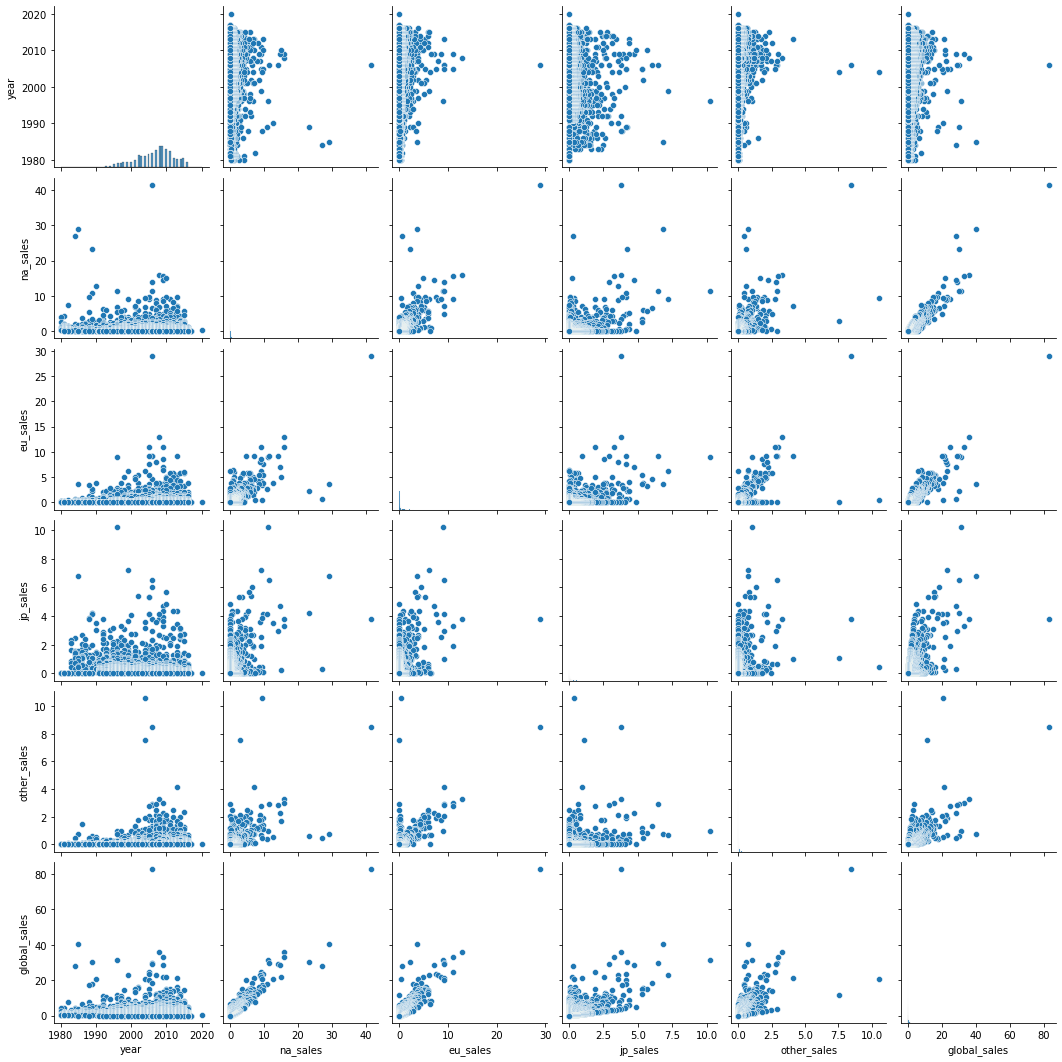

In [29]:
sns.pairplot(ventas)

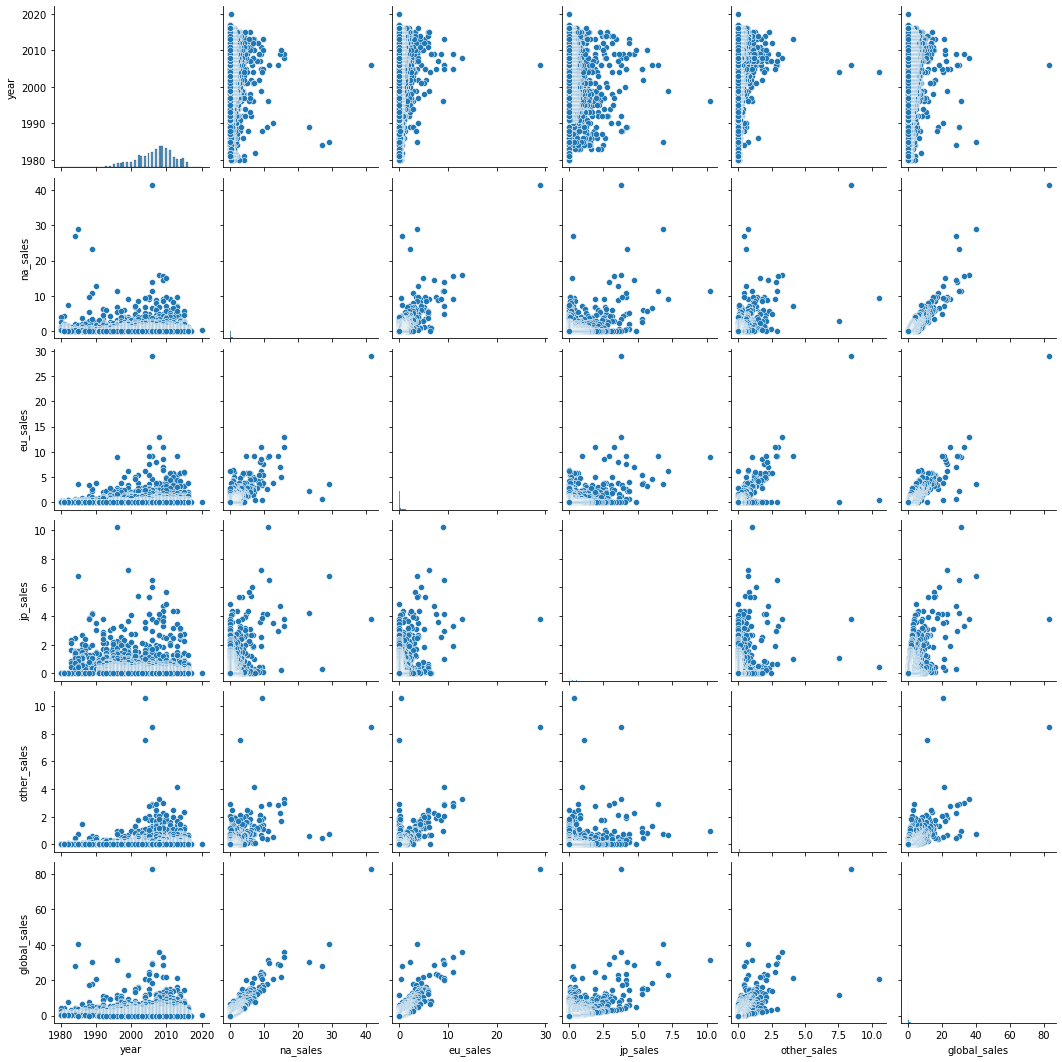

In [30]:
sns.pairplot(ventas_sin_nulos)

Tras confirmar que no existe un cambio sigificativo en la distribución de nuestros datos y teniendo en cuenta el baj porcentaje de nulos con que contamos, finalmente tomamos la decisión de **eliminar los datos nulos** de nuestro dataset con el objetivo de facilitar el análisis posterior.

In [74]:
ventas_final

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [82]:
# Cambiamos el tipo de dato de la variable 'year':
ventas_final = ventas_sin_nulos.copy()
ventas_final['year'] = ventas_final['year'].astype(int)

In [83]:
ventas_final.dtypes

name             object
platform         object
year              int64
genre            object
publisher        object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
global_sales    float64
dtype: object

In [87]:
# Guardamos el dataframe limpio en formato pickle:
ventas_final.to_pickle('../data/ventas_final.pkl')

-----------------------------------------------

## Dataset Puntuaciones

In [31]:
score= pd.read_csv('../data/games-data.csv')
score.head()

,name,platform,r-date,score,user score,developer,genre,players,critics,users
0,The Legend of Zelda: Ocarina of Time,Nintendo64,"November 23, 1998",99,9.1,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647
2,Grand Theft Auto IV,PlayStation3,"April 29, 2008",98,7.6,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806
3,SoulCalibur,Dreamcast,"September 8, 1999",98,8.5,Namco,"Action,Fighting,3D",1-2,24,324
4,Grand Theft Auto IV,Xbox360,"April 29, 2008",98,7.9,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364


In [32]:
score.shape

(17944, 10)

In [33]:
game_list = []
other_list = []

for g in score['name'].unique():
    if g in name_vg:
        game_list.append(g)
    else:
        other_list.append(g)


NameError: name 'name_vg' is not defined

In [ ]:
len(game_list)

In [ ]:
len(other_list)

In [ ]:
other_list


In [ ]:
chara_rep = pd.read_csv('../data/characters.grivg.csv')
chara_rep.head()

In [ ]:
chara_rep.shape

In [ ]:
char_sex = pd.read_csv('../data/sexualization.grivg.csv')
char_sex.head()

In [ ]:
char_sex.shape

In [ ]:
dev_rep = pd.read_csv('../data/games.grivg.csv')
dev_rep.head()

In [ ]:
dev_rep.columns